In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
BATCH_SIZE = 500
EPOCHS = 80
FOLDER = "results_before_change_2"

In [4]:
data = np.loadtxt("full_results.txt", delimiter=",")
outlier_filesizes = data[:,1]
proportions = data[:,0]
compressed_filesizes = data[:,2]
perc_diffs_data = data[:,3]
perc_diff_errs = data[:,4]


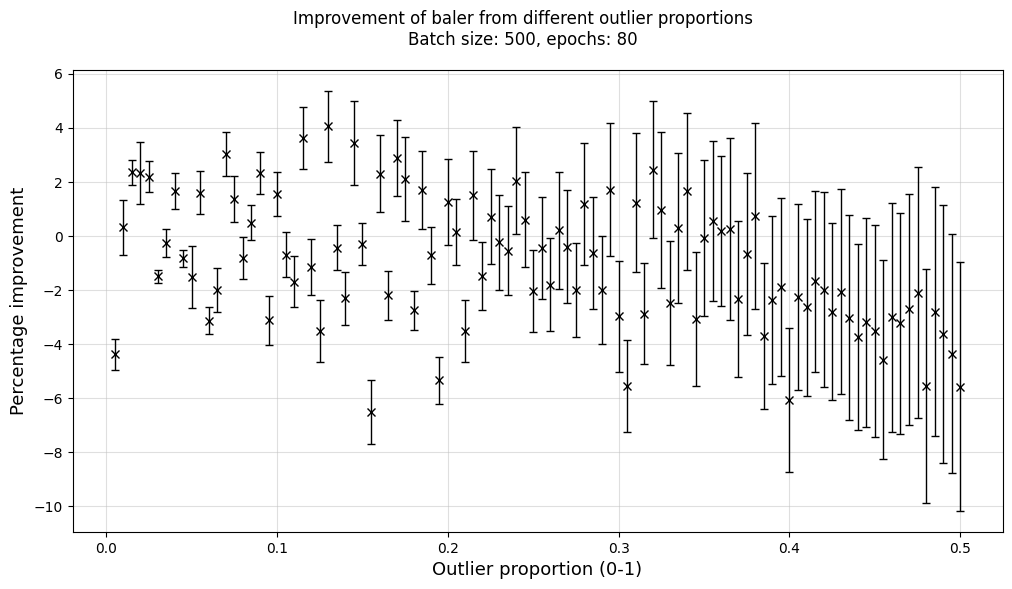

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(proportions, perc_diffs_data, yerr=perc_diff_errs, fmt="kx", capsize=3, elinewidth=1, label="data")
ax.set_xlabel("Outlier proportion (0-1)", fontsize=13)
ax.set_ylabel("Percentage improvement", fontsize=13)
fig.suptitle(f"Improvement of baler from different outlier proportions\nBatch size: {BATCH_SIZE}, epochs: {EPOCHS}")
ax.grid(color="silver", alpha=0.5)
plt.show()


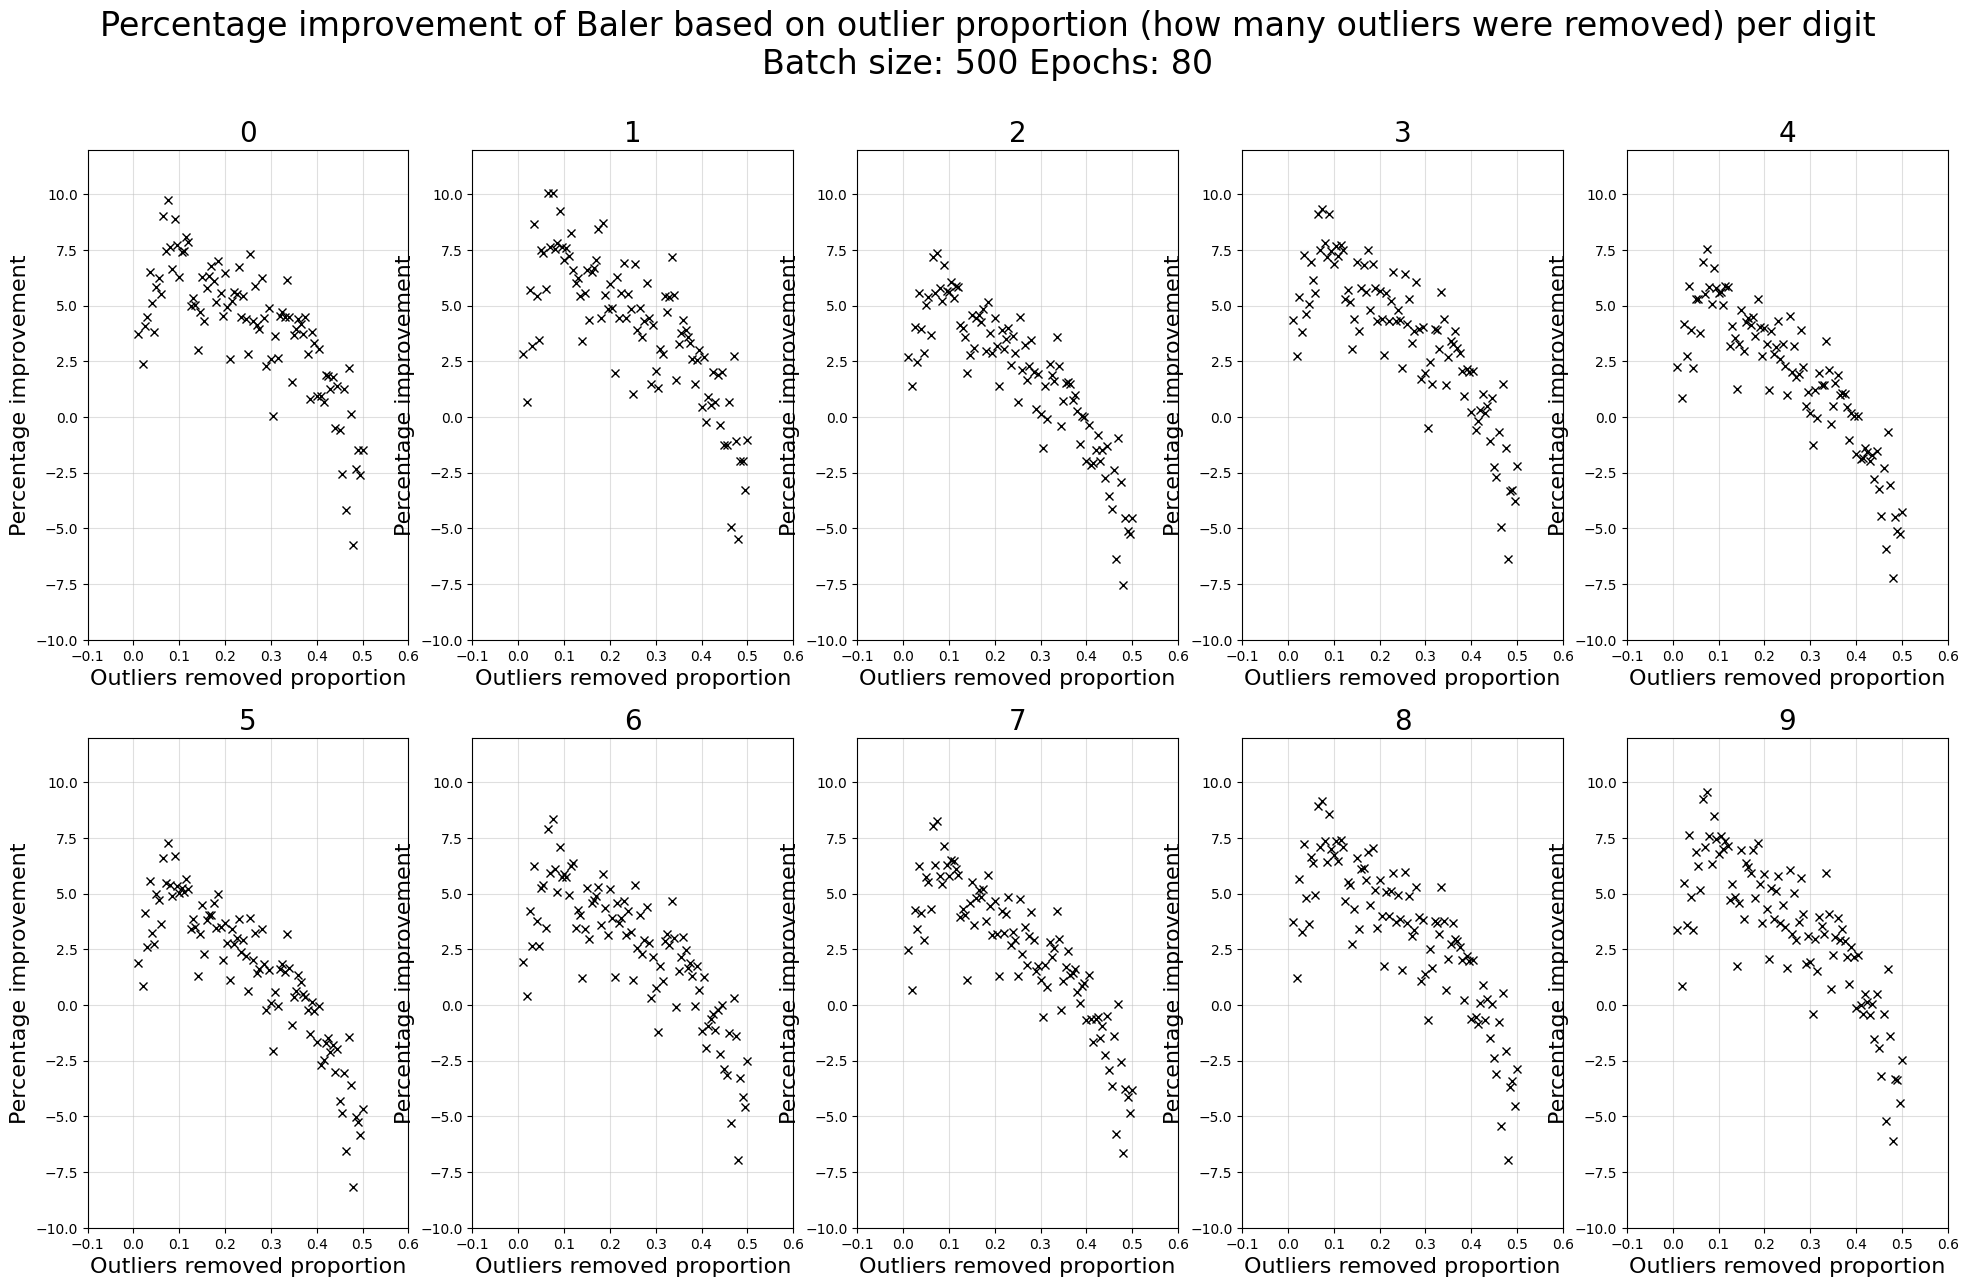

In [6]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(24, 14))
digits = list(range(10))

max_x, min_x, max_y, min_y = 0, 100, 0, 100
for ax, digit in zip(axs.flatten(), digits):
    for prop in proportions:
        inc_data = np.loadtxt(f"{FOLDER}/{prop:.3f}/inc_{digit}.txt", delimiter=",")
        sep_data = np.loadtxt(f"{FOLDER}/{prop:.3f}/sep_{digit}.txt", delimiter=",")
        if prop == 0.005 or prop == 0.015:
            pass
        else:
            # perc_diffs = (inc_data[:,0] - sep_data[:,0]) * 100 / inc_data[:,0]
            perc_diff = (np.mean(inc_data[:,0]) - np.mean(sep_data[:,0])) * 100 / np.mean(inc_data[:,0])
            # perc_diff_err = np.std((inc_data[:,0] - sep_data[:,0]) * 100 / inc_data[:,0])
            perc_diff_err = 0
            ax.errorbar(prop, perc_diff, yerr=perc_diff_err, marker="x", color="k")
    ax.set_xlabel("Outliers removed proportion", fontsize=16)
    ax.set_ylabel("Percentage improvement", fontsize=16)
    ax.set_title(f"{digit}", fontsize=20)

    yticks = ax.get_yticks()
    xticks = ax.get_xticks()
    if (maxi := max(xticks)) > max_x:
        max_x = maxi
    if (mini := min(xticks)) < min_x:
        min_x = mini
    if (maxi := max(yticks)) > max_y:
        max_y = maxi
    if (mini := min(yticks)) < min_y:
        min_y = mini

for ax in axs.flatten():
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.grid(color="silver", alpha=0.5)

fig.suptitle(f"Percentage improvement of Baler based on outlier proportion (how many outliers were removed) per digit\nBatch size: {BATCH_SIZE} Epochs: {EPOCHS}", fontsize=24)
# plt.savefig("outlier_proportion_per_digit.png", dpi=600)
plt.show()

        


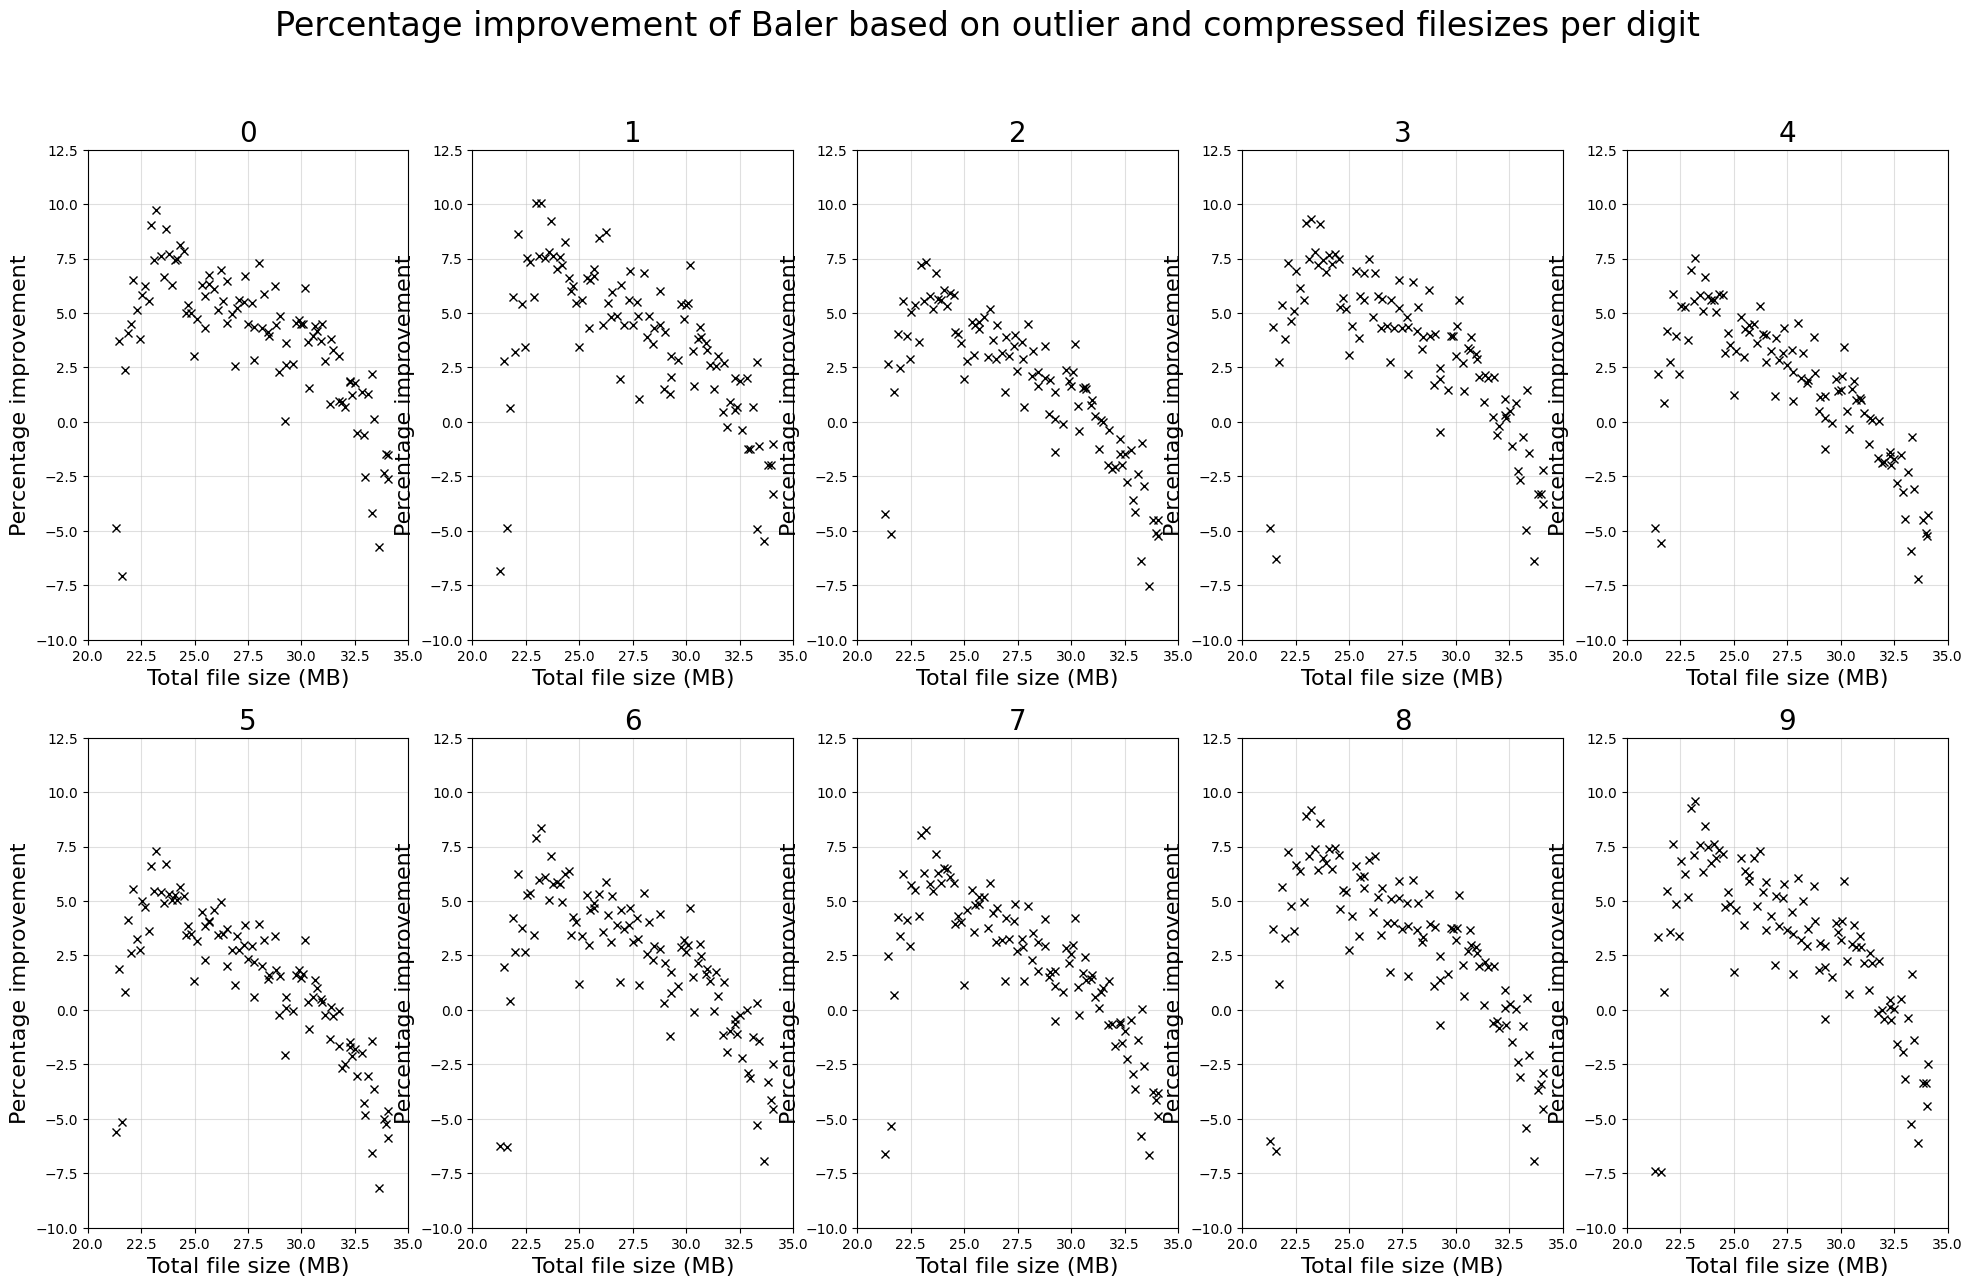

In [7]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(24, 14))
digits = list(range(10))

max_x, min_x, max_y, min_y = 0, 100, 0, 100
for ax, digit in zip(axs.flatten(), digits):
    for prop, out_size, comp_size in zip(proportions, outlier_filesizes, compressed_filesizes):
        inc_data = np.loadtxt(f"{FOLDER}/{prop:.3f}/inc_{digit}.txt", delimiter=",")
        sep_data = np.loadtxt(f"{FOLDER}/{prop:.3f}/sep_{digit}.txt", delimiter=",")
        # perc_diffs = (inc_data[:,0] - sep_data[:,0]) * 100 / inc_data[:,0]
        perc_diff = (np.mean(inc_data[:,0]) - np.mean(sep_data[:,0])) * 100 / np.mean(inc_data[:,0])
        perc_diff_err = 0
        combined_file = (out_size + comp_size) / 1024**2
        ax.errorbar(combined_file, perc_diff, yerr=perc_diff_err, marker="x", color="k")
    ax.set_xlabel("Total file size (MB)", fontsize=16)
    ax.set_ylabel("Percentage improvement", fontsize=16)
    ax.set_title(f"{digit}", fontsize=20)

    yticks = ax.get_yticks()
    xticks = ax.get_xticks()
    if (maxi := max(xticks)) > max_x:
        max_x = maxi
    if (mini := min(xticks)) < min_x:
        min_x = mini
    if (maxi := max(yticks)) > max_y:
        max_y = maxi
    if (mini := min(yticks)) < min_y:
        min_y = mini

for ax in axs.flatten():
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.grid(color="silver", alpha=0.5)

fig.suptitle("Percentage improvement of Baler based on outlier and compressed filesizes per digit", fontsize=24)
# plt.savefig("outlier_filesize_per_digit.png", dpi=600)

plt.show()

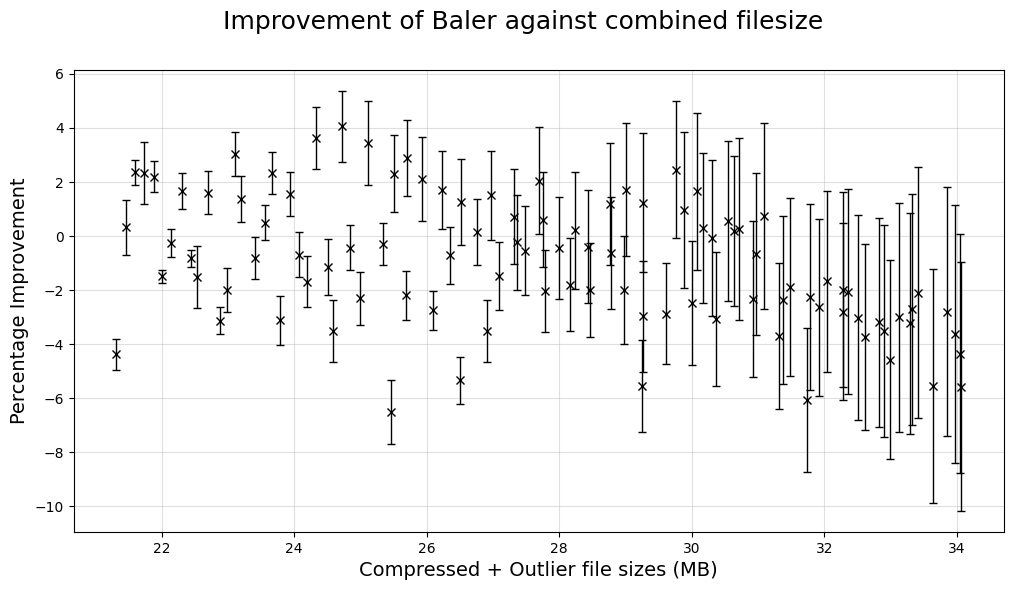

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

total_filesizes = (outlier_filesizes + compressed_filesizes) / 1024**2
ax.errorbar(total_filesizes, perc_diffs_data, perc_diff_errs, fmt="kx", capsize=3, elinewidth=1)
ax.set_xlabel("Compressed + Outlier file sizes (MB)", fontsize=14)
ax.set_ylabel("Percentage Improvement", fontsize=14)
fig.suptitle("Improvement of Baler against combined filesize", fontsize=18)
ax.grid(color="silver", alpha=0.5)
# plt.savefig("outlier_combined_filesize.png", dpi=600)
plt.show()


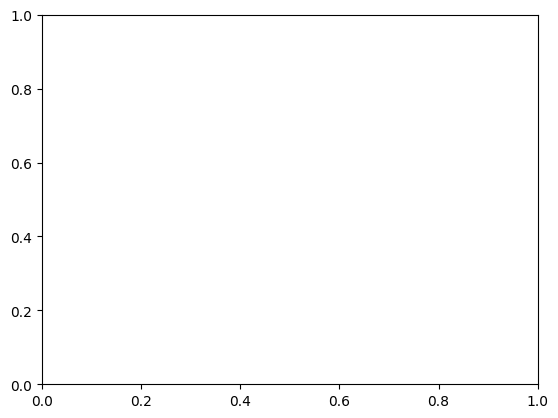

In [ ]:
full_results = np.loadtxt("full_results.txt", delimiter=",")
full_results = full_results[np.argsort(full_results[:,0])]

fig, ax = plt.subplots()
for prop in full_results[:,0]:
    perc_diffs = []
    for digit in range(10):
        inc_data = np.loadtxt(f"{FOLDER}/{prop:.3f}/inc_{digit}.txt", delimiter=",")
        sep_data = np.loadtxt(f"{FOLDER}/{prop:.3f}/sep_{digit}.txt", delimiter=",")
        
        if prop != 0.005 and prop != 




In [ ]:
import numpy as np

# Load the data
full_results = np.loadtxt("full_results.txt", delimiter=",")
full_results_before_change = np.loadtxt("full_results_before_change.txt", delimiter=",")

# Find the common values in the first column
common_values = np.intersect1d(full_results[:, 0], full_results_before_change[:, 0])

# Filter rows by the common values
filtered_full_results = full_results[np.isin(full_results[:, 0], common_values)]
filtered_full_results_before_change = full_results_before_change[np.isin(full_results_before_change[:, 0], common_values)]

# Sort both arrays by the first column
sorted_full_results = filtered_full_results[np.argsort(filtered_full_results[:, 0])]
sorted_full_results_before_change = filtered_full_results_before_change[np.argsort(filtered_full_results_before_change[:, 0])]

# Verify alignment
print(np.all(sorted_full_results[:, 0] == sorted_full_results_before_change[:, 0]))




True
[0.06298065 0.15828705 0.16875458 0.19301987 0.19304657 0.17192841
 0.23325729 0.25508499 0.23256302 0.28154755 0.27920151 0.27713394
 0.31695557 0.3447876  0.33346939 0.3231163  0.34425735 0.35201645
 0.39226151 0.4635849  0.35234833 0.44418716 0.52579498 0.53904343
 0.63759232 0.53502655 0.62459183 0.71130753 0.64427948 0.73817444
 0.56577301 0.68257904 0.78540039 0.72711945 0.53953934 0.7118721
 0.81604767 0.6942215  0.82159424 0.7485199  0.91397858 0.82229614
 0.92594147 0.79521561 1.01139069 0.7673111  0.73324585 1.02399063
 0.96165085 1.05097961 0.93082047 1.13058472 0.90760803 1.02716446
 0.86079025 1.03840637 1.05949402 0.97217178 1.10718536 1.01542282
 1.09645081 1.1595993  1.07387924 1.03987503 1.25062943 1.21038437
 1.23491287 1.1601181  1.37046051 1.23866653 1.26980209 1.28966522
 1.27553177 1.35663223 1.39570236 1.35815048 1.32946396 1.4448204
 1.34342575 1.33864594 1.43339539 1.54972839 1.54928207 1.54107666
 1.45885468]
